#  Analysis of Credit Approval Data

## 1. Objective

The purpose of this analysis is to build an automatic credit card approval predictor using machine learning techniques. I will use the Credit Approval Dataset which is a collection of credit card applications and the creit approval decisions. The data is available from the <a href="http://archive.ics.uci.edu/ml/datasets/credit+approval">UCI Machine Learning Repository</a>. The dataset has a mixture of both numerical and non-numerical features, that it contains values from different ranges, plus that it contains a number of missing entries. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data.
Attribute Information:
   <li>A1:	b, a.
   <li>A2:	continuous.
   <li>A3:	continuous.
   <li>A4:	u, y, l, t.
   <li>A5:	g, p, gg.
   <li>A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
   <li>A7:	v, h, bb, j, n, z, dd, ff, o.
   <li>A8:	continuous.
   <li>A10:	t, f.
   <li>A11:	continuous.
   <li>A12:	t, f.
   <li>A13:	g, p, s.
   <li>A14:	continuous.
   <li>A15:	continuous.
   <li>A16: +,-.
<p>The techniques include data visualization, statistical data analysis, Ada Boost Classifier, and neuronal network. This analysis is organized as follows:
<li>First, I will start off by loading and viewing the dataset.
<li>Generate several data visualizations to understand the underlying data;
<li>Perform data transformations as needed;
<li>After the data is in good shape, I will do some exploratory data analysis.
<li>Finally, I will create a machine learning model and a neural network model to predict whether an individual's credit card application will be accepted.

In [1]:
# Loading in required libraries
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
#from sklearn.utils.class_weight import compute_class_weight
import keras_tuner
from keras_tuner.tuners import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameter
import lazypredict
from lazypredict.Supervised import LazyClassifier
import optuna
from scikeras.wrappers import KerasClassifier
import keras
import tensorflow as tf
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.constraints import MaxNorm
import warnings
warnings.simplefilter("ignore")

## 2.  Data Cleaning
First, loading and viewing the dataset. I find that since this data is confidential, the contributor of the dataset has anonymized the feature names.

In [2]:
# Load dataset
cc_apps = pd.read_csv("datasets/cc_approvals.data", header=None)

# Inspect data
cc_apps.sample(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
41,b,28.92,15.00,u,g,c,h,5.33,t,t,11,f,g,00000,2283,+
297,b,32.92,2.50,u,g,aa,v,1.75,f,t,2,t,g,00720,0,-
252,a,17.83,11.00,u,g,x,h,1.00,t,t,11,f,g,00000,3000,+
360,a,30.25,5.50,u,g,k,v,5.50,f,f,0,t,s,00100,0,-
293,b,35.75,2.42,u,g,w,v,0.12,f,t,2,f,g,00220,1,-
17,a,23.25,5.88,u,g,q,v,3.17,t,t,10,f,g,00120,245,+
26,a,47.00,13.00,u,g,i,bb,5.17,t,t,9,t,g,00000,0,+
523,a,22.50,8.50,u,g,q,v,1.75,t,t,10,f,g,00080,990,-
261,a,52.17,0.00,y,p,ff,ff,0.00,f,f,0,f,g,00000,0,-
122,a,24.75,12.50,u,g,aa,v,1.50,t,t,12,t,g,00120,567,+


**Inspecting the applications**
<p>The features of this dataset have been anonymized to protect the privacy, but the probable features in a typical credit card application are 'Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'Citizen', 'ZipCode', 'Income' and finally the 'ApprovalStatus'. I'll use these features to rename the columns.</p>

In [3]:
cc_apps.columns = ['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 
                   'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense',
                   'Citizen', 'ZipCode', 'Income', 'Stat Approvalus']

In [4]:
cc_apps.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Stat Approvalus
0,b,30.83,0.00,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.46,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.50,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.54,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.62,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [5]:
cc_apps.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Stat Approvalus
0,b,30.83,0.00,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.46,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.50,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.54,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.62,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [6]:
# Print DataFrame information
print(cc_apps.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           690 non-null    object 
 1   Age              690 non-null    object 
 2   Debt             690 non-null    float64
 3   Married          690 non-null    object 
 4   BankCustomer     690 non-null    object 
 5   EducationLevel   690 non-null    object 
 6   Ethnicity        690 non-null    object 
 7   YearsEmployed    690 non-null    float64
 8   PriorDefault     690 non-null    object 
 9   Employed         690 non-null    object 
 10  CreditScore      690 non-null    int64  
 11  DriversLicense   690 non-null    object 
 12  Citizen          690 non-null    object 
 13  ZipCode          690 non-null    object 
 14  Income           690 non-null    int64  
 15  Stat Approvalus  690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB
Non

The dataset has a mixture of numerical and non-numerical features. This can be fixed with some preprocessing, but before I do that, I want to see if there are other dataset issues that need to be fixed.

In [7]:
# Print summary statistics for numeric data
cc_apps.describe(include='number')

,Debt,YearsEmployed,CreditScore,Income
count,690.00,690.00,690.00,690.00
mean,4.76,2.22,2.40,1017.39
std,4.98,3.35,4.86,5210.10
min,0.00,0.00,0.00,0.00
25%,1.00,0.17,0.00,0.00
50%,2.75,1.00,0.00,5.00
75%,7.21,2.62,3.00,395.50
max,28.00,28.50,67.00,100000.00


In [8]:
# Print summary statistics for object data
cc_apps.describe(include = 'object')

,Gender,Age,Married,BankCustomer,EducationLevel,Ethnicity,PriorDefault,Employed,DriversLicense,Citizen,ZipCode,Stat Approvalus
count,690,690,690,690,690,690,690,690,690,690,690,690
unique,3,350,4,4,15,10,2,2,2,3,171,2
top,b,?,u,g,c,v,t,f,f,g,00000,-
freq,468,12,519,519,137,399,361,395,374,625,132,383


In [9]:
# Inspect missing values in the dataset
cc_apps.isna().sum()

Gender             0
Age                0
Debt               0
Married            0
BankCustomer       0
EducationLevel     0
Ethnicity          0
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode            0
Income             0
Stat Approvalus    0
dtype: int64

In [10]:
# Inspect missing values from the 'object' data type columns
objcol_name = cc_apps.select_dtypes(include= ['object']).drop(columns ='Age').columns
for col in objcol_name:
    print(f'{col}: {cc_apps[col].unique()}')

Gender: ['b' 'a' '?']
Married: ['u' 'y' '?' 'l']
BankCustomer: ['g' 'p' '?' 'gg']
EducationLevel: ['w' 'q' 'm' 'r' 'cc' 'k' 'c' 'd' 'x' 'i' 'e' 'aa' 'ff' 'j' '?']
Ethnicity: ['v' 'h' 'bb' 'ff' 'j' 'z' '?' 'o' 'dd' 'n']
PriorDefault: ['t' 'f']
Employed: ['t' 'f']
DriversLicense: ['f' 't']
Citizen: ['g' 's' 'p']
ZipCode: ['00202' '00043' '00280' '00100' '00120' '00360' '00164' '00080' '00180'
 '00052' '00128' '00260' '00000' '00320' '00396' '00096' '00200' '00300'
 '00145' '00500' '00168' '00434' '00583' '00030' '00240' '00070' '00455'
 '00311' '00216' '00491' '00400' '00239' '00160' '00711' '00250' '00520'
 '00515' '00420' '?' '00980' '00443' '00140' '00094' '00368' '00288'
 '00928' '00188' '00112' '00171' '00268' '00167' '00075' '00152' '00176'
 '00329' '00212' '00410' '00274' '00375' '00408' '00350' '00204' '00040'
 '00181' '00399' '00440' '00093' '00060' '00395' '00393' '00021' '00029'
 '00102' '00431' '00370' '00024' '00020' '00129' '00510' '00195' '00144'
 '00380' '00049' '00050' '

I identified some issues after I inspected the DataFrame, including:
- the  dataset contains both numeric values (of types float64 and int64) and  non-numeric values (of types object). Age was categorized as object data type (and not float) as I would like, so I need to make it numeric.
- the dataset also contains values from several ranges, some features have a value range of 0 - 28, some have a range of 2 - 67, and some have a range of 1017 - 100000. 
- the maximum value of CreditScore is 67, which is much higher than the mean value of 2.4, it is possible that there are some outliers in the data.
- the dataset has missing values, the missing values in the dataset are labeled with '?'.
- the min value of features 'Income' is 0, I need to check if these are missing values or if they are student loans.
- the outcome values in Approved are '+' or '-' for whether credit had been granted or not, these character symbols aren’t meaningful as is, so I will need to transformed them turning the '+' to a '1' and the '-' to a '0'.
- the ZipCode has to many values, I need to reduce their number by dividing the range of values into intervals, or bins.

In [11]:
# Temporarily replace missing value question marks with NaN
cc_apps = cc_apps.replace('?', np.NaN)
cc_apps = cc_apps.replace('?',  np.NaN)

# Count the number of NaNs in the datasets and print the counts to verify
cc_apps.isna().sum()

Gender             12
Age                12
Debt                0
Married             6
BankCustomer        6
EducationLevel      9
Ethnicity           9
YearsEmployed       0
PriorDefault        0
Employed            0
CreditScore         0
DriversLicense      0
Citizen             0
ZipCode            13
Income              0
Stat Approvalus     0
dtype: int64

In [12]:
# Convert Age to float data type
cc_apps['Age'] = cc_apps['Age'].astype('float64')
cc_apps['Age'].dtypes

dtype('float64')

**Handling the outliers from 'CreditScore' variable**

First I will use a boxplot to see the distribution of the data and then I will use Z-score method to remove outliers.

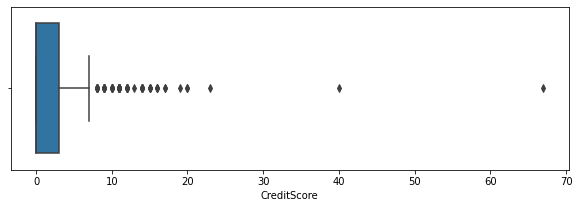

In [13]:
# Ploting a boxplot for the 'CreditScore'
plt.figure(figsize = (10,3))
sns.boxplot(data = cc_apps, x = 'CreditScore')
plt.show()

Seems that there are at least two outliers

In [14]:
from scipy import stats
#calculate the Z-score for each value in the 'CreditScore' column
z_scores = stats.zscore(cc_apps['CreditScore'])
#seting a threshold egal with 4
threshold = 4
#Filter the outliers 
cc_apps[abs(z_scores) > threshold]['CreditScore']

44     40
46     23
121    67
Name: CreditScore, dtype: int64

In [15]:
# filter out the outliers from 'CreditScore' column
cc_apps = cc_apps[abs(z_scores) < threshold]
cc_apps['CreditScore'].max()

20

**Handling the missing values from 'Age' column**

I can see from the summary output that the Age variable has missing values that I’ll have to fill in. I could simply use the mean of all the existing values to do so. Another method would be to check the relationship among the numeric values and use a linear regression to fill them in. The table below shows the correlation between all of the variables. The diagonal correlation values equal 1.000 because each variable is perfectly correlated with itself. The largest value in the first row from first tabel is 0.39 meaning age is most closely correlated with YearsEmployed (linear correlation). Similarly the largest value in the last row fron second tabel is 0.43 meaning Income is mostly correlated with CreditScore (rank correlation).

In [16]:
cc_apps.corr(method = 'pearson')

,Age,Debt,YearsEmployed,CreditScore,Income
Age,1.00,0.19,0.39,0.21,0.02
Debt,0.19,1.00,0.26,0.25,0.13
YearsEmployed,0.39,0.26,1.00,0.32,0.06
CreditScore,0.21,0.25,0.32,1.00,0.09
Income,0.02,0.13,0.06,0.09,1.00


In [17]:
cc_apps.corr(method = 'spearman')

,Age,Debt,YearsEmployed,CreditScore,Income
Age,1.00,0.11,0.26,0.12,0.04
Debt,0.11,1.00,0.26,0.20,0.11
YearsEmployed,0.26,0.26,1.00,0.32,0.09
CreditScore,0.12,0.20,0.32,1.00,0.43
Income,0.04,0.11,0.09,0.43,1.00


In [18]:
# Split the dataset into two parts: one with complete cases and another with missing values
complete_cases = cc_apps.dropna()
missing_cases = cc_apps[cc_apps['Age'].isnull()]

In [19]:
# Use the complete cases to fit a linear regression model that predicts the missing variable 
X_Age = complete_cases[['YearsEmployed','CreditScore']].values
y_Age = complete_cases['Age'].values
reg_model = LinearRegression()
reg_model.fit(X_Age, y_Age)

# Use the fitted model to predict the missing values from the Age column
X_missing_Age = missing_cases[['YearsEmployed','CreditScore']].values
y_pred_Age = reg_model.predict(X_missing_Age)
print(f'y_pred_Age mean: {round(y_pred_Age.mean(),2)};', f'cc_apps.Age mean: {round(np.mean(cc_apps.Age), 2)}')

y_pred_Age mean: 32.03; cc_apps.Age mean: 31.53


I will perform a hypothesis test to determine if y_pred_Age is significantly different or not from the values from cc_apps.Age, I will use t-test, which compares the means of two arrays.

In [20]:
# Set the null hypothesis: the y_pred_Age is not significantly different from the values from cc_apps.Age
null_hypothesis = 'The y_pred_Age is not significantly different from the values from cc_apps.Age'

# Set the significance level
alpha = 0.05

# Calculate the t-statistic and p-value for the hypothesis test
t_statistic, p_value = stats.ttest_1samp(y_pred_Age, np.mean(cc_apps.Age))

# Compare the p-value to the significance level
if p_value > alpha:
    print(null_hypothesis)
else:
    print("The y_pred_Age is significantly different from the values from cc_apps.Age")

The y_pred_Age is not significantly different from the values from cc_apps.Age


In [21]:
# Replace the missing values with the predicted values
cc_apps.loc[cc_apps['Age'].isnull(), 'Age'] = y_pred_Age

# Count the number of NaNs in the datasets and print the counts to verify
cc_apps['Age'].isna().sum()

0

**Handling the missing values from Gender, Married, BankCustomer, EducationLevel, Ethnicity and ZipCode columns**

I take care of the missing values present in the numeric columns. There are still some missing values to be imputed for columns Gender, Married, BankCustomer, EducationLevel, Ethnicity and ZipCode. I am going to impute these missing values with the most frequent values as present in the respective columns. 

In [22]:
# Iterate over each object type column of cc_apps
cat_col = cc_apps.select_dtypes(include =['object']).columns
for col in cat_col:
    # find the most frequent value
    most_frequent_gender = cc_apps[col].mode()[0]
    # fill missing values with the most frequent value
    cc_apps[col].fillna(most_frequent_gender, inplace=True)
        
# Count the number of NaNs in the dataset and print the counts to verify
cc_apps.isna().sum()

Gender             0
Age                0
Debt               0
Married            0
BankCustomer       0
EducationLevel     0
Ethnicity          0
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode            0
Income             0
Stat Approvalus    0
dtype: int64

**Handling the missing values from 'Income' column**

I can see from the summary output that the min value of features 'Income' is 0, I need to check if these are missing values or if they are loans for tuition fees.

In [23]:
# Checking the Income min and max values 
cc_apps['Income'].min(), cc_apps['Income'].max()

(0, 100000)

In [24]:
# Checking the number of records with age > 25, income equal to '0', employed equal with 't' and  approval status equal with '+'
cc_apps_filter = cc_apps[(cc_apps['Income'] == 0)
                         & (cc_apps['Employed'] == 't') 
                         & (cc_apps['Stat Approvalus'] == '+') 
                         & (cc_apps['Age'] > 25)]
len(cc_apps_filter)

41

There are only 41 approved loans with 0 income, employed status being true, approval status being true and age > 25. I will leave the unapproved loans with missing income values as they are, the lack of income was probably the reason for the credit being denied, also I will leave the approved loans with missing income values with age < 25 as they are, perhaps these are loans for tuition fees. For the rest of the approved loans with missing income values with age > 25, I will use regression imputation to fill in the missing values. This time I will use a Decision tree algoritm because between Credit Score and Income it's seem to be a nonlinear relationship. But first, I will use a scatterplot to see if I can detect any nonlinear relationships between Credit Score and the other numerical variables and then I want to check if there is a relationship between Income and education level.

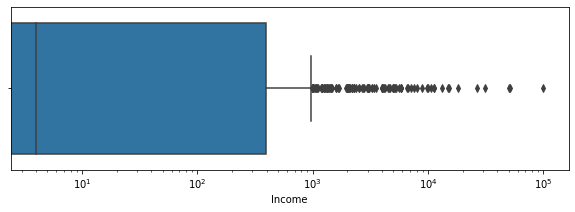

In [25]:
# Ploting a boxplot for the 'CreditScore'
plt.figure(figsize = (10,3))
sns.boxplot(data = cc_apps, x = 'Income')
plt.xscale('log')
plt.show()

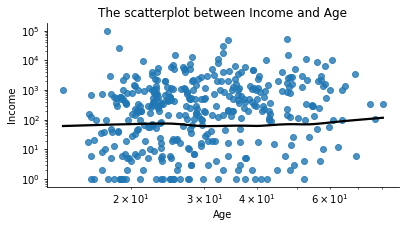

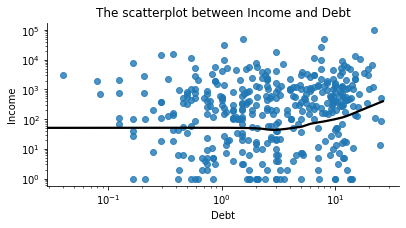

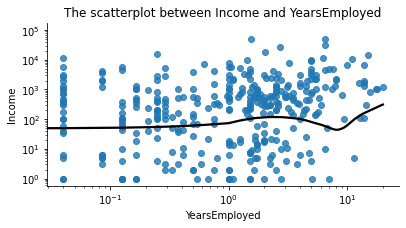

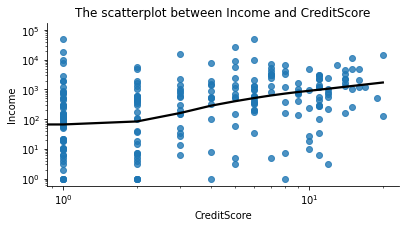

In [26]:
# Ploting a lmplot for the 'Income' vs the other numerical variables
num_col = cc_apps.select_dtypes(include =['float', 'int']).columns
for col in num_col.drop('Income'):
    sns.lmplot(data = cc_apps, x = col, y ='Income', lowess=True, height=3, aspect=2, 
               line_kws={'color' : 'black'}).set(title = f'The scatterplot between Income and {col}')
    plt.xscale('log')
    plt.yscale('log')
plt.show()

It seems that Income  are some nonlinear relationships with Credit Score, Years Employed and Debt, so I  will use and this three variable to predict the missing values from Income variable.

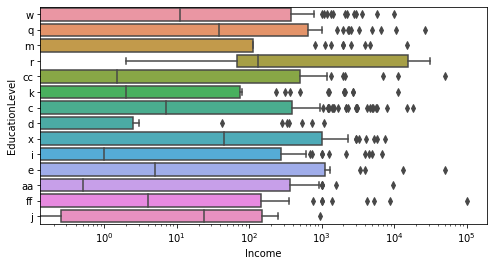

In [27]:
# Ploting a boxplot the 'EducationLevel' vs 'Income' to check if the Income is different for different levels of education
plt.figure( figsize = (8,4))
sns.boxplot(data = cc_apps, y = 'EducationLevel', x ='Income')
plt.xscale('log')
plt.show()

We see that the Income is different for different levels of education. But to see if they are significantly different, we'll need to use hypothesis tests. I will perform an ANOVA test to see  if they are significantly different.  ANOVA tests determine whether there are differences between the groups. The null hypothesis is that: "EducationLevel and Approved variables are independent". I set the significance level to 0.05. 

In [28]:
# Extract the numerical values for each group.
grouped_data = cc_apps.groupby('EducationLevel')
grouped_vals = [group[1]['Income'] for group in grouped_data]

# perform the ANOVA test using f_oneway() function from the scipy.stats
f_statistic, p_value = stats.f_oneway(*grouped_vals) # function takes in the grouped numerical values as arguments 
                                                     # using the * syntax to unpack the list of values
print(p_value)

0.05344212628926225


The p-value is 0.0529, which is higher than alpha at 0.5, this mean that I failed to reject the null hypothesis and that I can conclude that there is not a statistically significant difference between the groups. The EducationLevel and Approved variables are independent.

In [29]:
# Convert the EducationLevel feature and split the dataset into two parts: one with complete cases and another with missing values
complete_cases_inc = cc_apps[cc_apps['Income'] != 0]
missing_cases_inc = cc_apps[(cc_apps['Income'] == 0)
                         & (cc_apps['Employed'] == 't') 
                         & (cc_apps['Stat Approvalus'] == '+') 
                         & (cc_apps['Age'] > 25)]

In [30]:
X_inc = complete_cases_inc[['Debt', 'CreditScore', 'YearsEmployed']]
y_inc = complete_cases_inc['Income'].values

X_missing_inc = missing_cases_inc[['Debt', 'CreditScore', 'YearsEmployed']]
X_inc.shape, y_inc.shape, X_missing_inc.shape

((392, 3), (392,), (41, 3))

In [31]:
# Use the complete cases to fit a Decision Tree Regressor model that predicts the missing variable 
dtr_model = DecisionTreeRegressor(random_state=12)
dtr_model.fit(X_inc, y_inc)

# Use the fitted model to predict the missing values from the Income column
y_pred_inc = dtr_model.predict(X_missing_inc)
print(f'y_pred_inc mean: {y_pred_inc.mean()};', f"cc_apps.Income mean: {np.mean(cc_apps['Income'])}")

y_pred_inc mean: 1305.9024390243903; cc_apps.Income mean: 1019.63173216885


In [32]:
#Set the null hypothesis: 
null_hypothesis = 'The y_pred_inc is not significantly different from the values from cc_apps.Income'

# Set the significance level
alpha = 0.05

# Calculate the t-statistic and p-value for the hypothesis test
t_statistic, p_value = stats.ttest_1samp(y_pred_inc, np.mean(cc_apps['Income']))

# Compare the p-value to the significance level
if p_value > alpha:
    print(null_hypothesis)
else:
    print("The y_pred_inc is significantly different from the values from cc_apps.Income")

The y_pred_inc is not significantly different from the values from cc_apps.Income


In [33]:
# Replace the missing values with the predicted values
cc_apps.loc[(cc_apps['Income'] == 0) 
        & (cc_apps['Employed'] == 't') 
        & (cc_apps['Stat Approvalus'] == '+') 
        & (cc_apps['Age'] > 25), 'Income'] = y_pred_inc

In [34]:
# Check the maximum age of approved applications without income
cc_apps[cc_apps['Income'] == 0].groupby(['Stat Approvalus', 'Employed']).agg({'Age':'max', 'Stat Approvalus': 'count'}).rename(
                                                        columns = {'Age': 'Max Age', 'Stat Approvalus': 'No. of applications'})

Max Age  No. of applications
Stat Approvalus Employed                              
+               f           73.42                   61
                t           23.50                   11
-               f           69.50                  173
                t           63.33                    9

In [35]:
# Convert Income  to int16in order to reduce the memory usage
cc_apps['Income'].min(), cc_apps['Income'].max()

(0, 100000)

In [36]:
# Turning the '+' to a '1' and the '-' to a '0' in the 'Stat Approvalus' columns
maping = {'-': 0, '+':1}
cc_apps['Stat Approvalus'] = cc_apps['Stat Approvalus'].replace(maping) 

# Change the data type  to 'category'
cc_apps['Stat Approvalus'] = cc_apps['Stat Approvalus'].astype('category')
print(cc_apps['Stat Approvalus'].value_counts(), cc_apps['Stat Approvalus'].dtype)

0    383
1    304
Name: Stat Approvalus, dtype: int64 category


In [37]:
# Reducing the number of Zip Code values, I will keep only first three digits
cc_apps['ZipCode'] = cc_apps['ZipCode'].apply(lambda x: str(x)[0:3])
cc_apps['ZipCode'].unique()

array(['002', '000', '001', '003', '005', '004', '007', '009', '011',
       '006', '020', '008'], dtype=object)

## 3. Exploratory Analysis

I will look at the distribution of the numerical variables and I will compare the credit status by value of this variables.

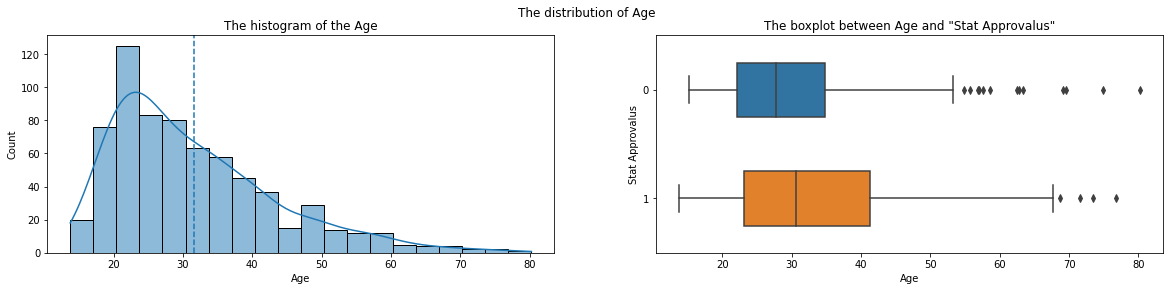

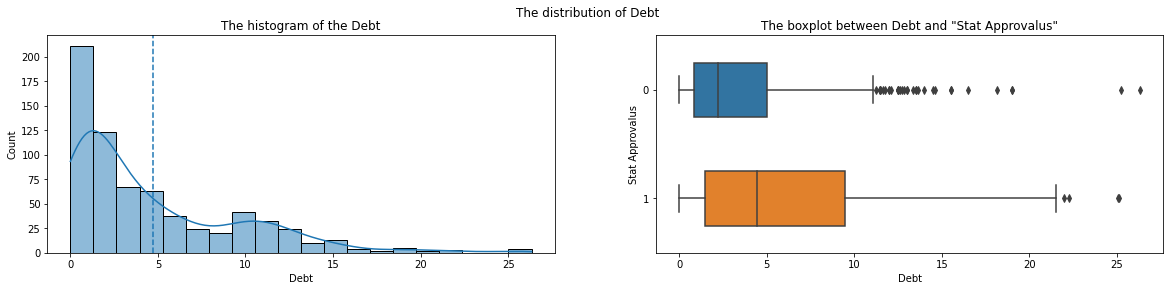

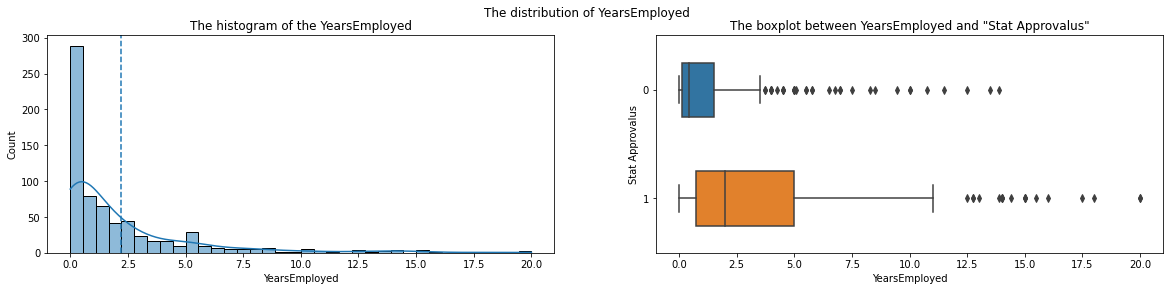

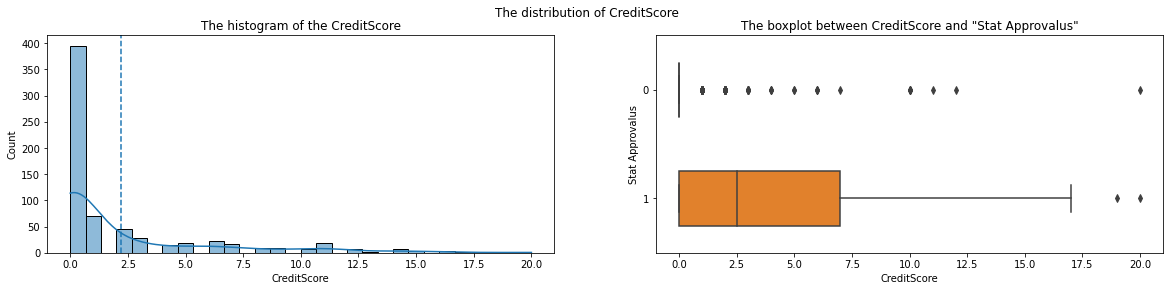

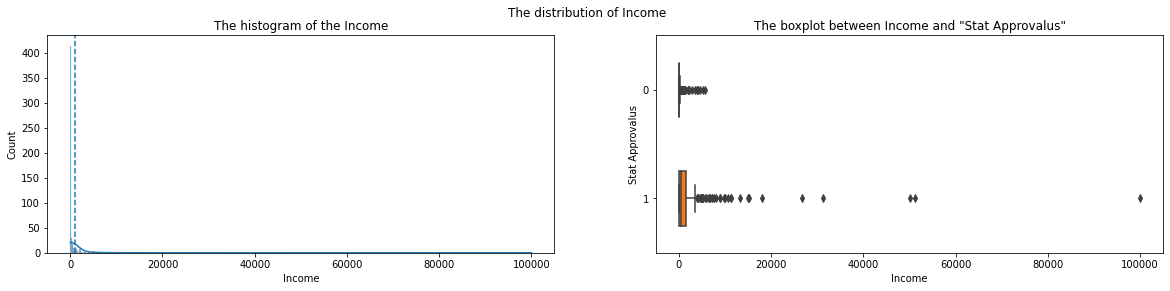

In [38]:
# Create a historgram and a boxplot of the numerical variable 
num_col = cc_apps.select_dtypes(include =['float', 'int']).columns
for col in num_col:
    fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=False, sharex=False, figsize=(20,4))
    sns.histplot(data =cc_apps, x=col, stat='count', kde=True,  
             ax=ax0).set(title = f'The histogram of the {col}')
    sns.boxplot(x=col, y="Stat Approvalus", data = cc_apps, width = 0.5,
            ax=ax1).set(title = f'The boxplot between {col} and "Stat Approvalus"')
    ax0.axvline(x=cc_apps[col].mean(), label='Mean', linestyle='--')
    fig.suptitle(f'The distribution of {col}')
plt.show()

The first thing I  note is that the data is skewed to the right because the tail is longer, so I will change the x-axis to log scale.

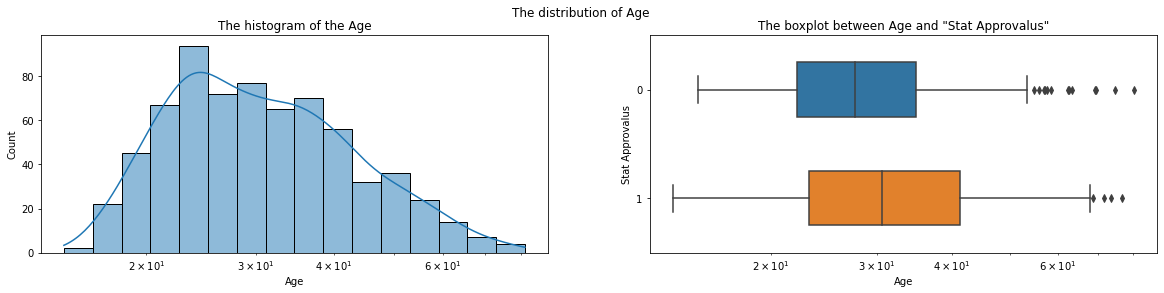

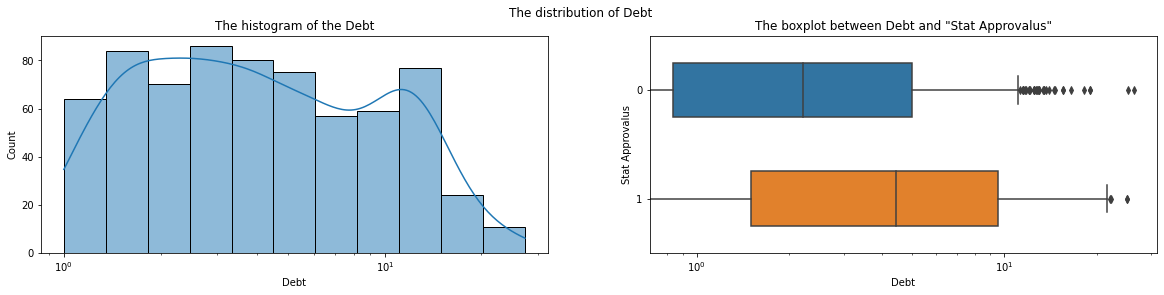

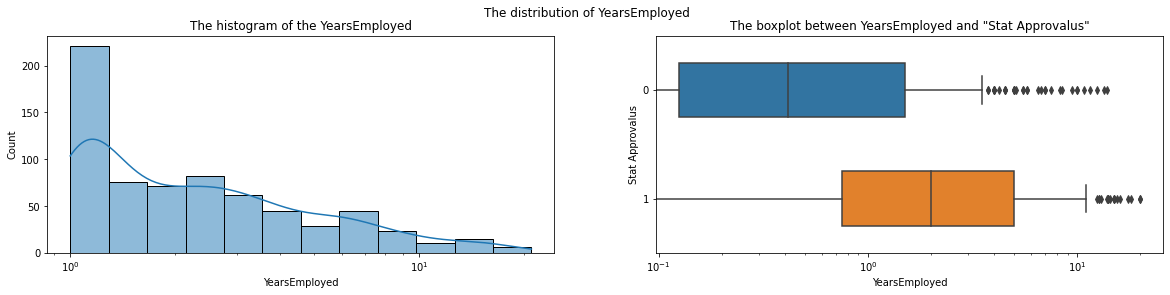

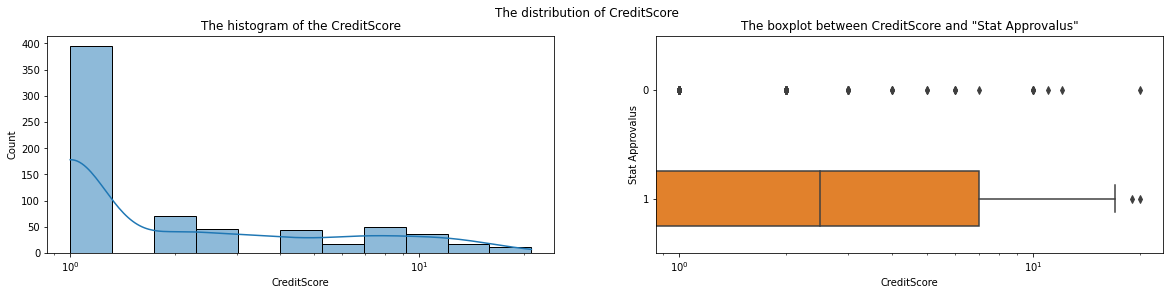

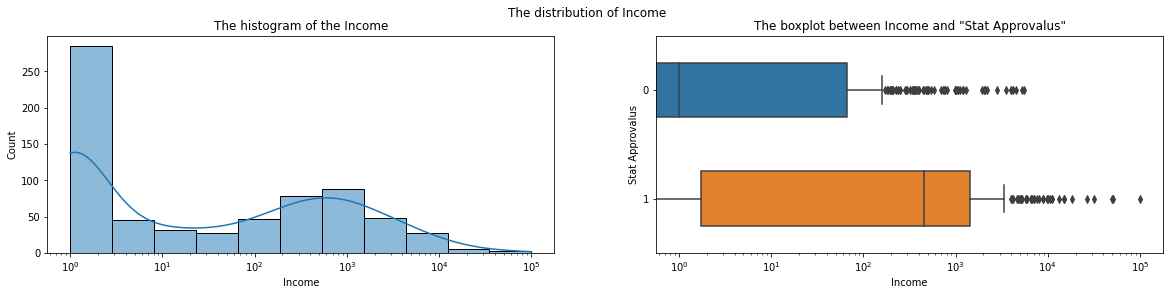

In [39]:
# Create a historgram and a boxplot of the numerical variable with a log scale on the x axis
for col in num_col:
    fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=False, sharex=False, figsize=(20,4))
    sns.histplot(data = cc_apps, x=cc_apps[col]+1, stat='count', kde=True, log_scale = True,
             ax=ax0).set(title = f'The histogram of the {col}')
    sns.boxplot(x=col, y="Stat Approvalus", data = cc_apps, width = 0.5, 
            ax=ax1).set(title = f'The boxplot between {col} and "Stat Approvalus"')
    plt.xscale('log')
    fig.suptitle(f'The distribution of {col}')
plt.show()

- The boxplots seem to add more informational value now because for each dataset, the mean of the approved applications is further distributed from the mean of those denied. We can tell from the boxplot that the median of the values of the two approval status categories is slightly different for all five numerical features. We can conclude that our target variable is not independent of the numerical variables. We can interpret these facts as credit applicants with lower age, income, years employed, and credit score values being less likely to be granted credit. To check if our target variable is independent of the five numerical variables, I will use a t-test. The null hypothesis is that: "The approval status and numerical variable are independent". I will set the significance level to 0.05. 

In [40]:
import scipy.stats as stats
for col in num_col:
    # Split the data into two groups based on the binary variable
    group1 = cc_apps[cc_apps['Stat Approvalus'] == 0][col]
    group2 = cc_apps[cc_apps['Stat Approvalus'] == 1][col]

    # Conduct a t-test to compare the means of the two groups
    t_stat, p_value = stats.ttest_ind(group1, group2)

    # Print the p-value
    print(f"P_value for Stat Approvalus & {col}: {p_value}")

P_value for Stat Approvalus & Age: 2.437133997145572e-05
P_value for Stat Approvalus & Debt: 1.0442781537992137e-07
P_value for Stat Approvalus & YearsEmployed: 1.3256860991019153e-18
P_value for Stat Approvalus & CreditScore: 1.4781190646487473e-37
P_value for Stat Approvalus & Income: 3.5508144618047544e-07


 The p-value is smaller than alpha at 0.5, that suggests that we can reject the null hypothesis.

**Ploting the distribution of categorical features to see if there is any correlation with the target feature 'Stat Approvalus'**

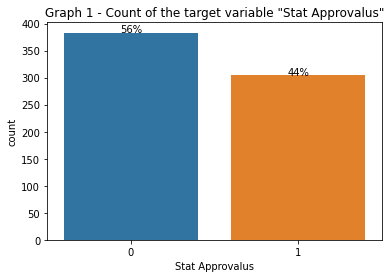

In [41]:
# Create a count plot of the target variable - owned
g = sns.countplot(x="Stat Approvalus", data=cc_apps)
for p in g.patches:
    height = f'{round(p.get_height()/len(cc_apps)*100)}%'
    g.text(p.get_x()+p.get_width()/2., p.get_height() + 0.5, height, ha="center")
g.set_title('Graph 1 - Count of the target variable "Stat Approvalus"')
plt.show()

From the plot above, we can see the proportion of the minority class (1) is about 44%. Therefore, the imbalanced class issue is mild, so I decided not to address this issue at this point.

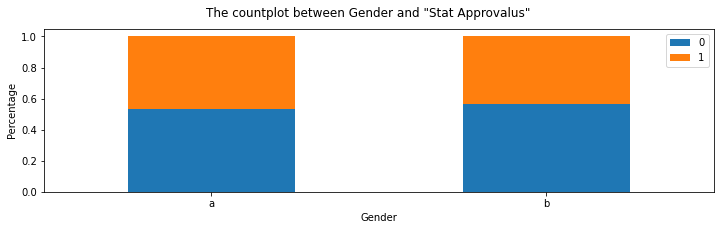

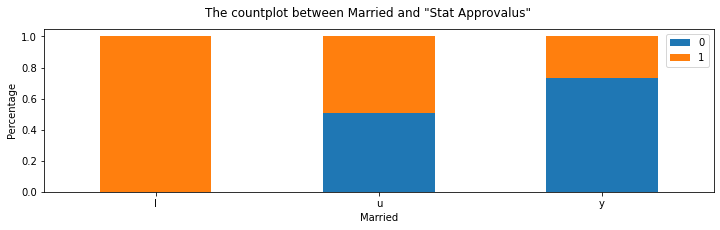

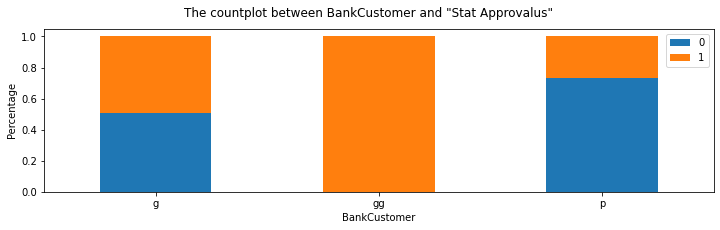

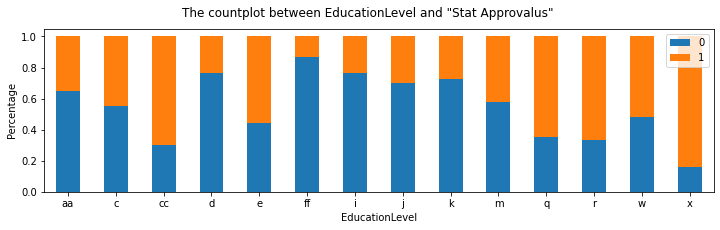

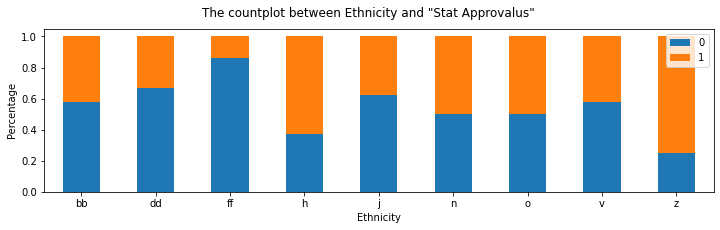

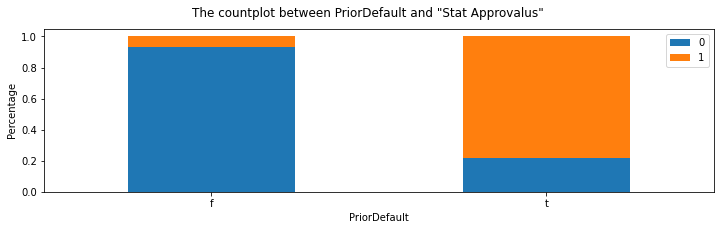

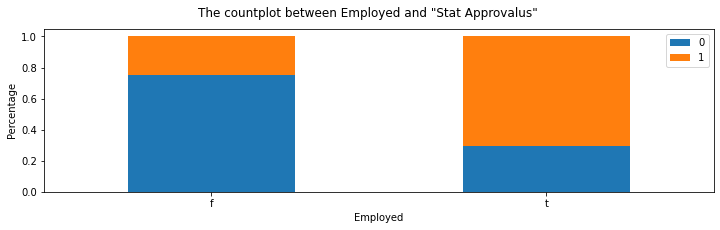

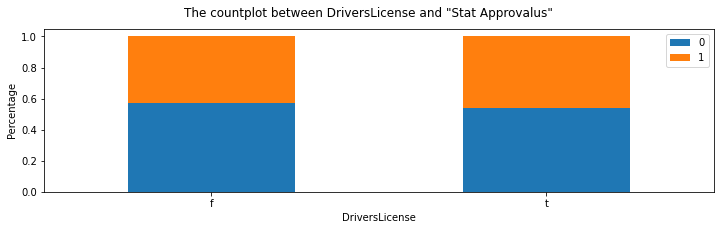

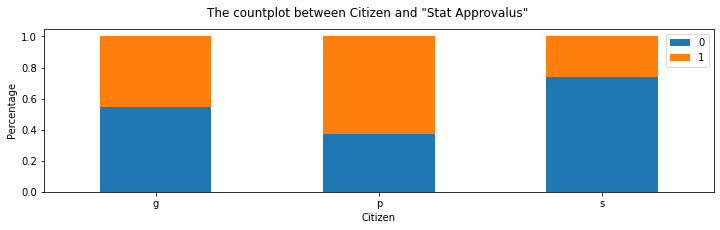

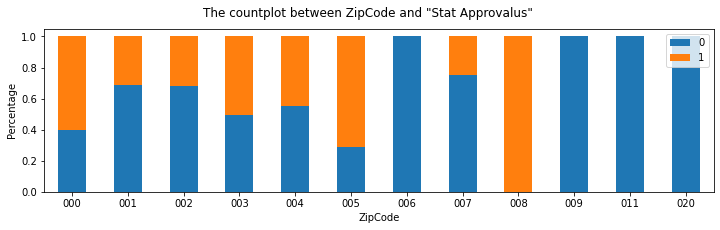

In [42]:
col_list = list(cat_col)
col_list.remove("Stat Approvalus")
for col in col_list:
    props = cc_apps.groupby(col)['Stat Approvalus'].value_counts(normalize=True)
    wide_props = props.unstack()
    wide_props.plot(kind="bar", stacked=True, figsize=(12,3))
    plt.suptitle(f'The countplot between {col} and "Stat Approvalus"')
    plt.xticks(rotation = 360)
    plt.ylabel('Percentage')
plt.show()

The count charts shown above may be challenging to interpret since the meaning of the categorical feature values is unknown. However, we can observe that the values for approved and unapproved loans vary across different categorical feature categories for 'Married',
'BankCustomer', 'EducationLevel', 'Ethnicity',  'PriorDefault', 'Employed', 'Citizen' and  'ZipCode'. For example, if the 'Stat Approvalus' category was independent of the 'Employed' category, the split between the 'Employed' categories would be at the same height in each of the two bars. There's some variation here, but we'll need a chi-square independence test to determine whether it's a significant difference. The null hypothesis is that independence occurs. I will use a significance level of 0.05.

In [43]:
contingency_table = pd.crosstab(cc_apps['Gender'], cc_apps['Stat Approvalus'])
contingency_table 

Stat Approvalus,0,1
Gender,,
a,112,97
b,271,207


In [44]:
for col in col_list:
    # Create a contingency table
    contingency_table = pd.crosstab(cc_apps[col], cc_apps['Stat Approvalus'])
    # Perform the chi-square test
    chi2_stat, p_val, dof, ex = stats.chi2_contingency(contingency_table)

    # Print the results
    print(f"{col}: p_value = {p_val}")

    # Interpret the results
    if p_val < 0.05:
        print(f"There is evidence that the '{col}' and 'Stat Approvalus' are dependent.", '\n')
    else:
        print(f"There is no evidence that the '{col}' and 'Stat Approvalus' are dependent.", '\n')

Gender: p_value = 0.5024537870766221
There is no evidence that the 'Gender' and 'Stat Approvalus' are dependent. 

Married: p_value = 7.170153606331751e-07
There is evidence that the 'Married' and 'Stat Approvalus' are dependent. 

BankCustomer: p_value = 7.170153606331751e-07
There is evidence that the 'BankCustomer' and 'Stat Approvalus' are dependent. 

EducationLevel: p_value = 7.077540018531091e-15
There is evidence that the 'EducationLevel' and 'Stat Approvalus' are dependent. 

Ethnicity: p_value = 4.4469148087873884e-07
There is evidence that the 'Ethnicity' and 'Stat Approvalus' are dependent. 

PriorDefault: p_value = 1.272909882640878e-78
There is evidence that the 'PriorDefault' and 'Stat Approvalus' are dependent. 

Employed: p_value = 2.047850430775287e-32
There is evidence that the 'Employed' and 'Stat Approvalus' are dependent. 

DriversLicense: p_value = 0.48255617569658416
There is no evidence that the 'DriversLicense' and 'Stat Approvalus' are dependent. 

Citizen: p

The p-value is above 0.05 only for Gender and Driver's License, so I conclude that these two variables are independent of the 'Stat Approvalus' variable.

## 4. Preprocessing the data and feature selection

<p>There is still some minor but essential data preprocessing needed before I proceed towards building our machine learning model. I am going to divide these remaining preprocessing steps into two main tasks:</p>
<ol>
<li>Convert the non-numeric data into numeric.</li>
<li>Scale the feature values to a uniform range.</li>
</ol>
<p>First, I will be converting all the non-numeric values into numeric ones. We do this because not only it results in a faster computation but also many machine learning models (especially the ones developed using scikit-learn) require the data to be in a strictly numeric format. I will do this by using the <code>get_dummies()</code> method from pandas.</p>
Also, we saw that features like 'Gender', 'Citizen', 'Age', 'Married', 'BankCustomer' and 'DriversLicense'are not as important as the other features in the dataset for predicting credit card approvals.  I will drop them  in order to reduce the dimensionality of our data, that will help the machine learning model to perform faster and better.

In [45]:
# Create X and y features 
X = cc_apps.drop(columns = ['Age','Stat Approvalus', 'Gender', 'Citizen', 'Married', 'BankCustomer', 'DriversLicense'], axis = 1)
y = cc_apps['Stat Approvalus'].values
X.shape, y.shape

((687, 9), (687,))

In [46]:
# Convert the categorical features in the train and test sets independently
X = pd.get_dummies(X, drop_first = True)
X.shape

(687, 38)

In [47]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaled_X = scaler.fit_transform(X)
rescaled_X.shape

(687, 38)

In [48]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(rescaled_X, y, test_size=0.30, random_state=12)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((480, 38), (207, 38), (480,), (207,))

## 5. Analyze and Build Baseline Model

Predicting whether a credit will be approved or not is a classification task in machine learning. First I will use lazypredict library to compare the performance of different models and to choose the best one as a baseline model for my task.

In [49]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None, random_state=12)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models 

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 14.15it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BernoulliNB,0.90,0.90,0.90,0.90,0.00
AdaBoostClassifier,0.89,0.90,0.90,0.89,0.06
XGBClassifier,0.88,0.88,0.88,0.88,1.39
NearestCentroid,0.88,0.88,0.88,0.88,0.01
BaggingClassifier,0.88,0.88,0.88,0.88,0.01
LogisticRegression,0.87,0.87,0.87,0.87,0.03
LGBMClassifier,0.87,0.87,0.87,0.87,0.05
RandomForestClassifier,0.87,0.87,0.87,0.87,0.09
RidgeClassifierCV,0.86,0.86,0.86,0.86,0.01


We observe that BernoulliNB and AdaBoostClassifier are the two models that yield the best results. To assess their performance on new, unseen data, I will conduct a cross-validation

Mean cross validation score for BernoulliNB:  0.81
Standard deviation cross validation score for BernoulliNB:  0.07
Mean cross validation score for Ada Boost Classifier:  0.83
Standard deviation cross validation score for Ada Boost Classifier:  0.05


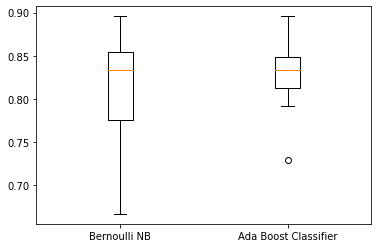

In [50]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import AdaBoostClassifier

models = {"Bernoulli NB": BernoulliNB(), "Ada Boost Classifier": AdaBoostClassifier()}
results = []

# Loop through the models' values
for  model in models.values():
  kf = KFold(n_splits=10, random_state=42, shuffle=True)
  
  # Perform cross-validation
  cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
  
  # Append the results
  results.append(cv_scores)

# Create a box plot of the results
print("Mean cross validation score for BernoulliNB: ", round(results[0].mean(), 2))
print("Standard deviation cross validation score for BernoulliNB: ", round(results[0].std(), 2))
print("Mean cross validation score for Ada Boost Classifier: ", round(results[1].mean(), 2))
print("Standard deviation cross validation score for Ada Boost Classifier: ", round(results[1].std(), 2))
plt.boxplot(results, labels=models.keys())
plt.show()

We observe that the linear AdaBoostClassifier performs slightly better. The mean score of 0.83 indicates that, on average, the model achieves a relatively high level of accuracy, and a small standard deviation of 0.05 suggests that the model's performance is consistent across different cross-validation folds. Now, I will evaluate the model's performance on the test set using classification accuracy and the classification report. In predicting credit card applications, it is crucial to assess whether the machine learning model can equally predict both approved and denied statuses.

In [51]:
# Create an instance of the AdaBoostClassifier 
ada_boost = AdaBoostClassifier(random_state = 12)

# Fit the AdaBoostClassifier model
ada_boost.fit(X_train, y_train)

# Use rfc to predict instances from the test set and store it
y_pred_ab = ada_boost.predict(X_test)

# Get the accuracy score of ada_boost model
print("Accuracy of  Ada Boost Classifier: ", accuracy_score(y_test, y_pred_ab))

Accuracy of  Ada Boost Classifier:  0.893719806763285


In [52]:
# Print the classification_report of the AdaBoostClassifier
print('Classification_report of Ada Boost Classifier:', '\n', classification_report(y_test, y_pred_ab))

Classification_report of Ada Boost Classifier: 
               precision    recall  f1-score   support

           0       0.93      0.88      0.90       118
           1       0.85      0.91      0.88        89

    accuracy                           0.89       207
   macro avg       0.89      0.90      0.89       207
weighted avg       0.90      0.89      0.89       207



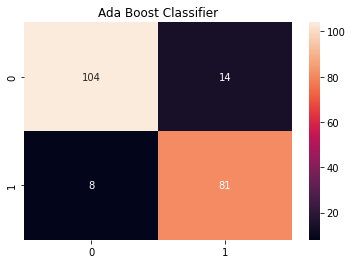

In [53]:
# Visualizing the confusion_matrix for the two models
sns.heatmap(confusion_matrix(y_test, y_pred_ab), annot=True, fmt='d').set(title='Ada Boost Classifier')
plt.show()

### Tuning the model using Optuna
I'll use Optuna to find the optimal hyperparameters of the model, the metric based on which I have to optimize the hyperparameters is a  mean cross-validation score with k=10.

In [ ]:
# find the optimal hyperparametries for LGBM Classifier
import optuna
def objective(trial):
    param_grid = {'n_estimators' : trial.suggest_int('n_estimators', 50, 200, step=10),
    'learning_rate' : trial.suggest_uniform('learning_rate', 0.001, 1.0)}
    model = AdaBoostClassifier(**param_grid, random_state = 12)
    model.fit(X_train, y_train)
    return cross_val_score(model, X_train, y_train, n_jobs=-1, cv=kf).mean()
study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials = 200)
model= AdaBoostClassifier(**study.best_params)

In [55]:
print('Best Params: {}'.format(study.best_params))

Best Params: {'n_estimators': 120, 'learning_rate': 0.03060463782340612}


In [56]:
print('Mean cross validation score for Ada Boost Classifier before tuning: {:.2f}'.format(results[1].mean()))
print('Mean cross validation score for Ada Boost Classifier with best params: {:.2f}'.format(study.best_trial.value))

Mean cross validation score for Ada Boost Classifier before tuning: 0.83
Mean cross validation score for Ada Boost Classifier with best params: 0.85


It seems that my tuned model performs slightly better as the untuned one.

In [57]:
# create the Ada Boost Classifier with best params
ada_boost_tuned = AdaBoostClassifier(n_estimators=study.best_params['n_estimators'],
                                     learning_rate=study.best_params['learning_rate'], random_state =12)

# Fit the BernoulliNB model
ada_boost_tuned.fit(X_train, y_train)

# Use rfc to predict instances from the test set and store it
y_pred_ab2 = ada_boost_tuned.predict(X_test)

# Print the classification_report of the tuned Ada Boost Classifier 
print('Classification_report of Ada Boost Classifier tuned:', '\n', classification_report(y_test, y_pred_ab2))

Classification_report of Ada Boost Classifier tuned: 
               precision    recall  f1-score   support

           0       0.93      0.81      0.86       118
           1       0.78      0.92      0.85        89

    accuracy                           0.86       207
   macro avg       0.86      0.86      0.85       207
weighted avg       0.87      0.86      0.86       207



## 6. Keras Neural Network Model 
Now I will create a neural network model to see if I can obtaine better results. 

In [58]:
from keras.utils.vis_utils import plot_model

In [59]:
# Function to create model, required for KerasClassifier
model = Sequential()
model.add(Dense(X_train.shape[1]*3, activation = 'relu', input_shape=(X_train.shape[1],)))
model.add(Dense(X_train.shape[1]*2, activation = 'relu'))
model.add(Dense(X_train.shape[1], activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid')) 

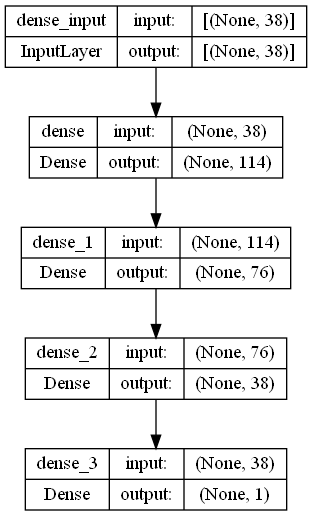

In [60]:
#Visualization of the model structure.
plot_model(model, to_file='model_structure.png', show_shapes=True)

In [61]:
# Compile and train the model
model.compile(loss = 'binary_crossentropy',  optimizer =keras.optimizers.Adam(learning_rate=0.075), metrics=['accuracy'])

In [62]:
# Convert y_train and y_test to a tensor 
y_train_nn = tf.constant(y_train, dtype=tf.int32)
y_test_nn = tf.constant(y_test, dtype=tf.int32)
X_train.shape, X_test.shape, y_train_nn.shape, y_test_nn.shape

((480, 38), (207, 38), TensorShape([480]), TensorShape([207]))

In [ ]:
# Train the model I will use ReduceLROnPlateau to improve the model performance during training by automatically adjusting the learning rate and
# EarlyStopping to stop training the model when its performance begins to degrade
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 25)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
model.fit(X_train, y_train_nn, validation_split = 0.2, batch_size = 40, epochs=400, callbacks = [early_stop, reduce_lr])

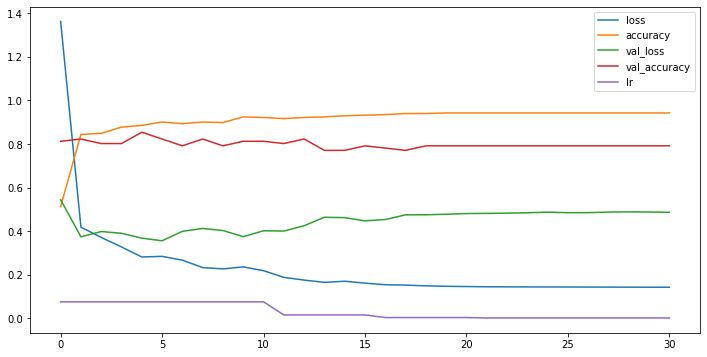

In [64]:
# Create a graph comparing training and validation loss and accuracy
acc_loss = pd.DataFrame(model.history.history)
acc_loss.plot(figsize =(12, 6))
plt.show()

My Neural Network Model is overfitting. I will now try to reduce overfitting by adding L1_L2 regularization on the first layer to weights of the model and by adding a Dropout layer.

In [65]:
# Function to create model, required for KerasClassifier
model2 = Sequential()
model2.add(Dense(X_train.shape[1]*3,  kernel_regularizer = 'l1_l2', activation = 'relu', input_shape=(X_train.shape[1],)))
model2.add(Dropout(0.2))
model2.add(Dense(X_train.shape[1]*2,  activation = 'relu', kernel_constraint=MaxNorm(2)))
model2.add(Dense(X_train.shape[1], activation = 'relu'))
model2.add(Dense(1, activation = 'sigmoid')) 

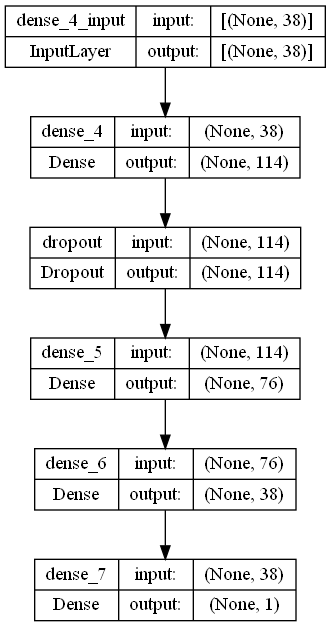

In [66]:
#Visualization of the model structure.
plot_model(model2, to_file='model_structure.png', show_shapes=True)

In [67]:
# Compile and train the model
model2.compile(loss = 'binary_crossentropy',  optimizer =keras.optimizers.Adam(learning_rate=0.075), metrics=['accuracy'])

In [ ]:
# Train the model 
model2.fit(X_train, y_train_nn, validation_split = 0.2, batch_size = 40, epochs=400, callbacks = [early_stop, reduce_lr])

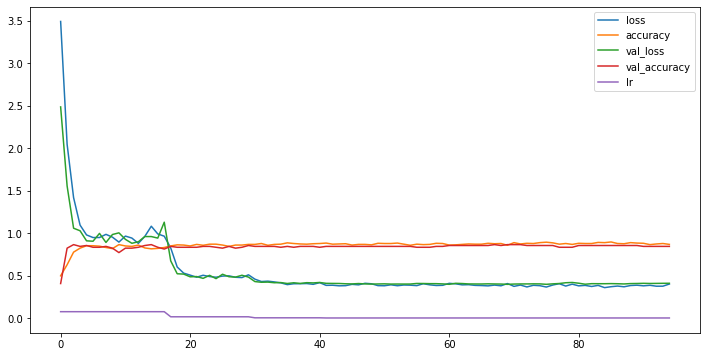

In [69]:
# Create a graph comparing training and validation loss and accuracy
acc_loss2 = pd.DataFrame(model2.history.history)
acc_loss2.plot(figsize =(12, 6))
plt.show()

In [70]:
# evaluate the model on the test set
y_pred_nn = np.where(model2.predict(X_test) > 0.5, 1,0).flatten()
print('Classification_report of Ada Boost Classifier:', '\n', classification_report(y_test, y_pred_ab2))
print('Classification_report of Neural Network:', '\n', classification_report(y_test, y_pred_nn))

7/7 [==============================] - 0s 2ms/step
Classification_report of Ada Boost Classifier: 
               precision    recall  f1-score   support

           0       0.93      0.81      0.86       118
           1       0.78      0.92      0.85        89

    accuracy                           0.86       207
   macro avg       0.86      0.86      0.85       207
weighted avg       0.87      0.86      0.86       207

Classification_report of Neural Network: 
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       118
           1       0.84      0.89      0.86        89

    accuracy                           0.88       207
   macro avg       0.88      0.88      0.88       207
weighted avg       0.88      0.88      0.88       207



After I have solved the problem of overfitting, my Neural Network Model performs almost the same as Ada Boost Classifier. I will now try to tune my neural network model.

### KerasTuner

In [71]:
# Write a function that creates and returns a Keras model
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Dense(
      # Tune number of units.
      units=hp.Int("units", min_value=5, max_value=400, step=5),
      # Tune the activation function to use.
      activation=hp.Choice('activation', ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid']),
      kernel_regularizer = 'l1_l2', input_shape=(X_train.shape[1],)
  ))
    model.add(Dropout(hp.Float('rate', min_value=0, max_value=1,step=0.01)))
    model.add(keras.layers.Dense(
      units=hp.Int("units", min_value=5, max_value=200, step=5),
      activation=hp.Choice('activation', ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid'])))
    model.add(Dense(1, activation = 'sigmoid'))
    # Define the optimizer learning rate as a hyperparameter.
    lr = hp.Float("lr", min_value=1e-5, max_value=1, sampling="log")
    model.compile(loss = 'binary_crossentropy',  optimizer =keras.optimizers.Adam(learning_rate=lr), metrics=['accuracy'])
    return model
build_model(keras_tuner.HyperParameters())

In [72]:
# initialize a Random Search tuner
import random
random.seed(12)
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=10,
    executions_per_trial=5,
    overwrite=True,
    directory="hyperparam_NN",
    project_name="hyperparam_NN"
   )

In [73]:
#print a summary 
tuner.search_space_summary()

Search space summary
Default search space size: 4
units (Int)
{'default': None, 'conditions': [], 'min_value': 5, 'max_value': 400, 'step': 5, 'sampling': 'linear'}
activation (Choice)
{'default': 'softmax', 'conditions': [], 'values': ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid'], 'ordered': False}
rate (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 1.0, 'step': 0.01, 'sampling': 'linear'}
lr (Float)
{'default': 1e-05, 'conditions': [], 'min_value': 1e-05, 'max_value': 1.0, 'step': None, 'sampling': 'log'}


In [74]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
# search for the best hyperparameter configuration
tuner.search(X_train, y_train_nn, epochs=200, validation_split=0.2, callbacks=[early_stopping])

Trial 10 Complete [00h 00m 08s]
val_accuracy: 0.6270833373069763

Best val_accuracy So Far: 0.862500011920929
Total elapsed time: 00h 04m 07s
INFO:tensorflow:Oracle triggered exit


In [75]:
# print a summary of the search results
tuner.results_summary()

Results summary
Results in hyperparam_NN\hyperparam_NN
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 01 summary
Hyperparameters:
units: 145
activation: tanh
rate: 0.74
lr: 6.354932390600397e-05
Score: 0.862500011920929

Trial 00 summary
Hyperparameters:
units: 345
activation: sigmoid
rate: 0.06
lr: 0.00013195443599435557
Score: 0.8541666626930237

Trial 07 summary
Hyperparameters:
units: 145
activation: sigmoid
rate: 0.1
lr: 0.00026753684121124836
Score: 0.6958333373069763

Trial 09 summary
Hyperparameters:
units: 115
activation: hard_sigmoid
rate: 0.05
lr: 0.001303673618469654
Score: 0.6270833373069763

Trial 02 summary
Hyperparameters:
units: 190
activation: sigmoid
rate: 0.65
lr: 2.071372367796919e-05
Score: 0.6083333373069764

Trial 05 summary
Hyperparameters:
units: 225
activation: sigmoid
rate: 0.78
lr: 1.1926932656496608e-05
Score: 0.6041666626930237

Trial 03 summary
Hyperparameters:
units: 130
activation: softmax
rate: 0.45
lr: 1.246006492576749

In [76]:
# Get the top 2 models.
model = tuner.get_best_models(num_models=2)
best_model = model[0]

In [77]:
# Build the model.
best_model.build()
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 145)               5655      
                                                                 
 dropout (Dropout)           (None, 145)               0         
                                                                 
 dense_1 (Dense)             (None, 145)               21170     
                                                                 
 dense_2 (Dense)             (None, 1)                 146       
                                                                 
Total params: 26,971
Trainable params: 26,971
Non-trainable params: 0
_________________________________________________________________


In [78]:
# evaluate the model on the test set and print the Classification_report
y_pred_nn2 = np.where(best_model.predict(X_test) > 0.5, 1,0).flatten()
print('Classification_report of Ada Boost Classifier tuned:', '\n', classification_report(y_test, y_pred_ab2))
print('Classification_report of Neural Network tuned:', '\n', classification_report(y_test, y_pred_nn2))

7/7 [==============================] - 0s 2ms/step
Classification_report of Ada Boost Classifier tuned: 
               precision    recall  f1-score   support

           0       0.93      0.81      0.86       118
           1       0.78      0.92      0.85        89

    accuracy                           0.86       207
   macro avg       0.86      0.86      0.85       207
weighted avg       0.87      0.86      0.86       207

Classification_report of Neural Network tuned: 
               precision    recall  f1-score   support

           0       0.92      0.80      0.85       118
           1       0.77      0.91      0.84        89

    accuracy                           0.85       207
   macro avg       0.85      0.85      0.84       207
weighted avg       0.86      0.85      0.85       207



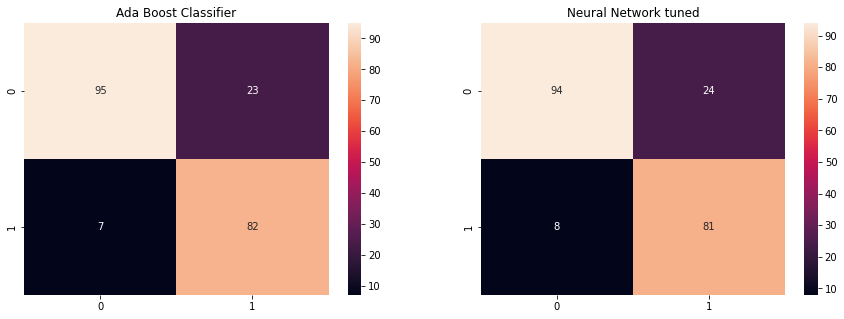

In [79]:
# Visualizing the confusion_matrix for the two models
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_ab2), ax=axs[0], annot=True, fmt='d').set(title='Ada Boost Classifier')
sns.heatmap(confusion_matrix(y_test, y_pred_nn2), ax=axs[1], annot=True, fmt='d').set(title='Neural Network tuned')
plt.show()

Neural Network tuned performs almost the same as Ada Boost Classifier tuned.